## Transforming nonlinear data with Kernel PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, FloatSlider, Dropdown

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics.regression import mean_squared_error

In [2]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

h = .02  # step size in the mesh

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = {'moons': make_moons(noise=0.2, random_state=0),
            'circles': make_circles(noise=0.2, factor=0.5, random_state=1),
            'linear': linearly_separable} 

In [3]:
from sklearn.decomposition import KernelPCA

In [4]:
dataset_name = 'moons'

def plot_kpca(kernel_name, gamma):
  kpca = KernelPCA(kernel=kernel_name, gamma=gamma)
    
  X, y = datasets[dataset_name]
  X_transformed = kpca.fit_transform(X)
  
  plt.title('gamma: {}'.format(gamma))
  plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='coolwarm')
  plt.show()

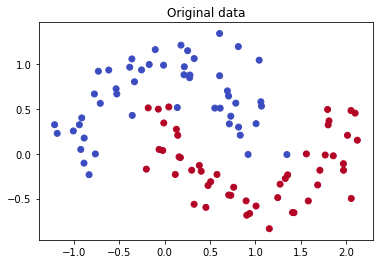

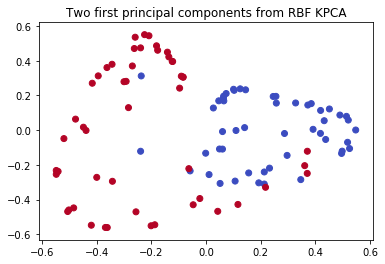

In [5]:
X, y = datasets[dataset_name]

plt.title('Original data')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.show()

X_transformed = KernelPCA(kernel='rbf', gamma=5).fit_transform(X)

plt.title('Two first principal components from RBF KPCA')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='coolwarm')
plt.show()

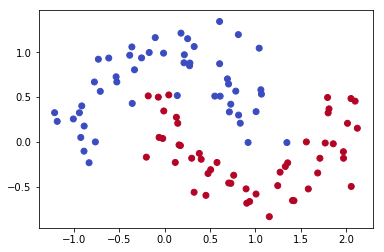

In [6]:
X, y = datasets[dataset_name]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.show()

In [7]:
interact(plot_kpca, 
         kernel_name=Dropdown(options=['rbf', 'sigmoid']),
         gamma=FloatSlider(min=0.001, max=10, step=0.001, value=1))

<function __main__.plot_kpca>